In [3]:
import numpy as np
import pytesseract
from PIL import Image
import cv2
from matplotlib import pyplot as plt

# Importing the one of the image files (PNG in this case due to the lossless compression algorithm - we should read directly into Python from PDF though)

image = cv2.imread('../msk_RF1-0.png')


In [5]:
import cv2

#-----Reading the image-----------------------------------------------------
img = image
cv2.imshow("img",img) 

#-----Converting image to LAB Color model----------------------------------- 
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
cv2.imshow("lab",lab)

#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)
cv2.imshow('l_channel', l)
cv2.imshow('a_channel', a)
cv2.imshow('b_channel', b)

#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
cv2.imshow('CLAHE output', cl)

#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,a,b))
cv2.imshow('limg', limg)

#-----Converting image from LAB Color model to RGB model--------------------
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
cv2.imshow('final', final)

In [2]:
gimage = cv2.imread('gray2.png',cv2.IMREAD_GRAYSCALE)


In [3]:
gimage

array([[204, 204, 204, ..., 204, 204, 204],
       [204, 204, 204, ..., 204, 204, 204],
       [204, 204, 204, ..., 204, 204, 204],
       ...,
       [204, 204, 204, ..., 204, 204, 204],
       [204, 204, 204, ..., 204, 204, 204],
       [204, 204, 204, ..., 204, 204, 204]], dtype=uint8)

In [ ]:
for line in image:
    for i in range(0,len(line)):
        if line[i] > 60 and line[i] < 65:
            line[i] = 0
        if line[i] > 165 and line[i] < 205:
            line[i] = 255

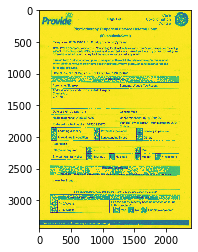

In [5]:
plt.imshow(image)

In [6]:
MyInput = Image.fromarray(image)

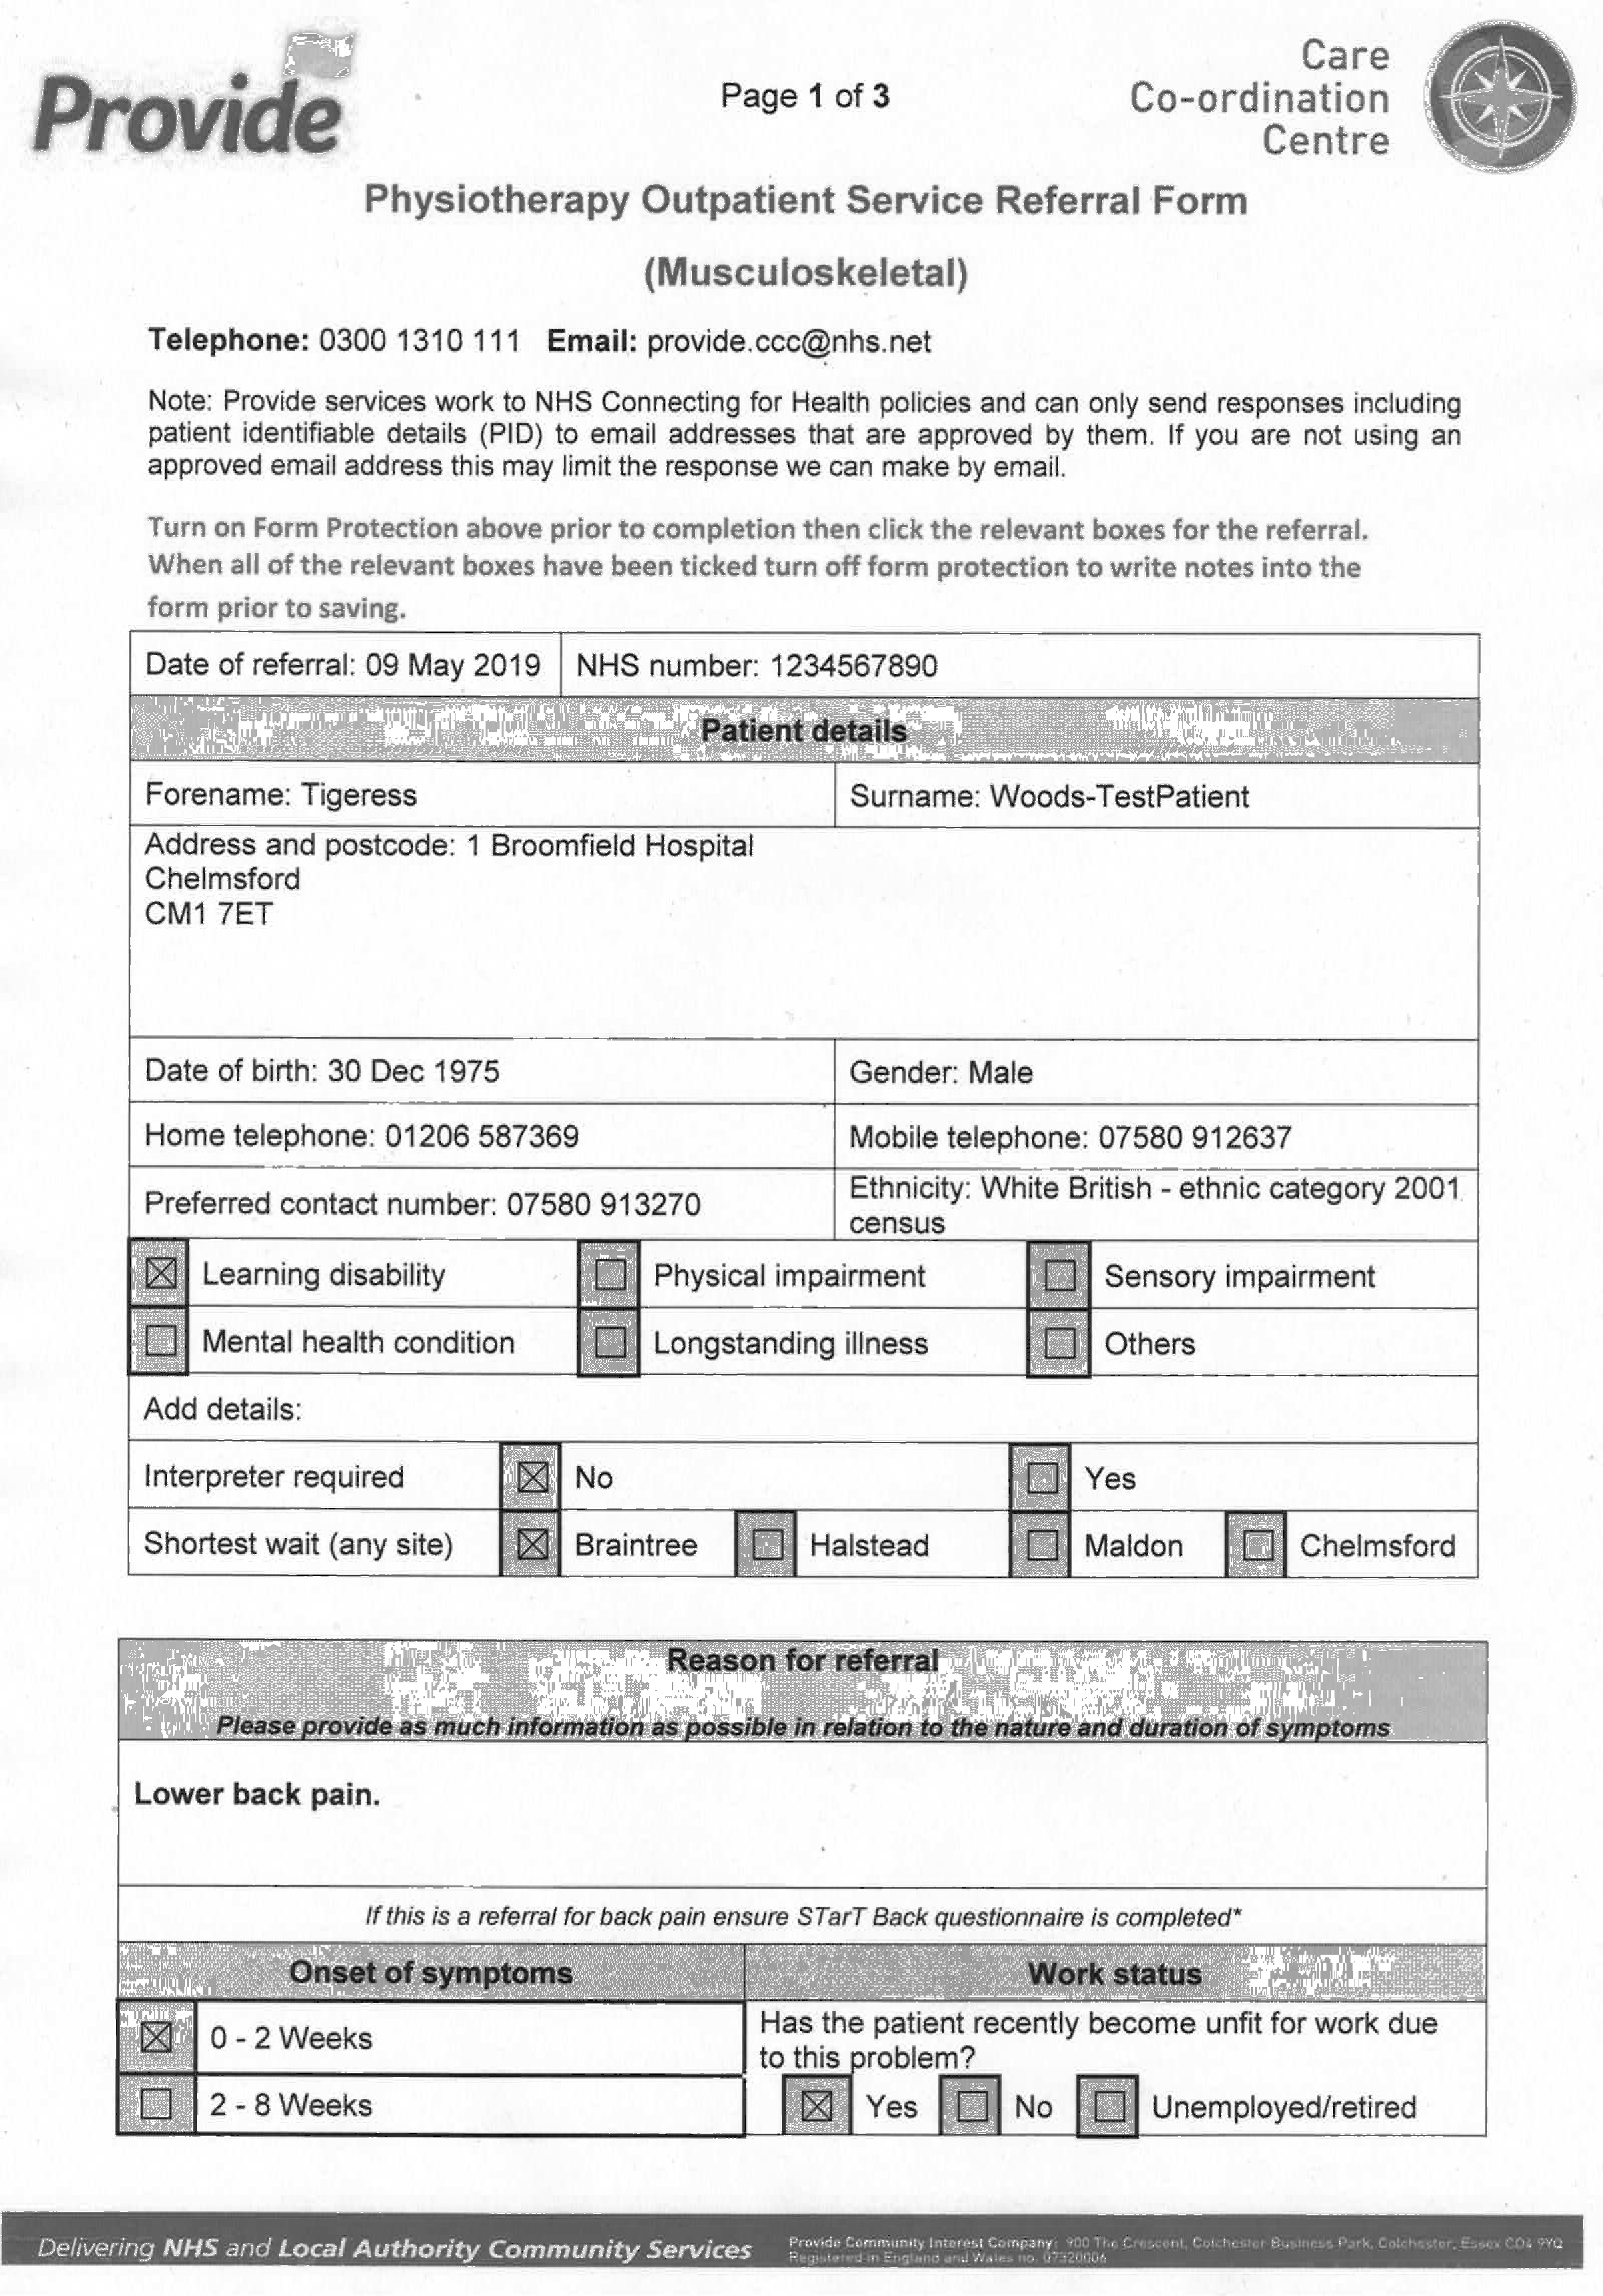

In [7]:
MyInput

In [8]:
cv2.imwrite('filtered.png',image)

True

In [9]:
text = pytesseract.image_to_string('filtered.png')
print(text)

Care

- Page 1 of 3 Co-ordination
Provide Centre

Physiotherapy Outpatient Service Referral Form

 

(Musculoskeletal)

Telephone: 0300 1310111 Email: provide.ccc@nhs.net

Note: Provide services work to NHS Connecting for Health policies and can only send responses including
patient identifiable details (PID) to email addresses that are approved by them. If you are not using an
approved email address this may limit the response we can make by email.

Turn on Form Protection above prior to completion then click the releyant boxes for the referral.
When all of the relevant boxes have been ticked turn off form protection to write notes into the

form prior to saving.

 

 

  

Date of referral: 09 May 2019 | NHS number: 1234567890

 
  

Patient details —

  
       

Forename: Tigeress Surname: Woods-TestPatient

 

 

Address and postcode: 1 Broomfield Hospital
Chelmsford
CM1 7ET

 

 

      
 
   

Date of birth: 30 Dec 1975 Gender: Male

    
    

Mobile telephone: 07580 912637

Et

In [37]:
print(text)

Care
- Page 1 of 3 Co-ordination
Centre

Physiotherapy Outpatient Service Referral Form

(Musculoskeletal)
Telephone: 0300 1310 111 Email: provide.cec@nhs.net

Note: Provide services work to NHS Connecting for Health policies and can only send responses including
patient identifiable details (PID) to email addresses that are approved by them. If you are not using an
approved email address this may limit the response we can make by email.

Turn on Form Protection above prior to completion then click the relevant boxes for the referral.
When all of the relevant boxes have been ticked turn off form protection to write notes into the

form prior to saving.
Date of referral: 09 May 2019

       

  
  

   
  

Forename: Tigeress

Address and postcode: 1 Broomfield Hospital
Chelmsford
CM1 7ET

census
repaemnme fe
1} Halstead cL ] Maldon | Chelmsford

       
       
             
      
  

   

 

Lower back pain.

   

If this is a referral for back pain ensure STarT Back questionnaire is

In [35]:
text = pytesseract.image_to_string('../msk_RF1-0.png')


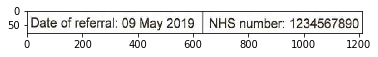

In [3]:
y = 950
h = 80
x = 205
w = 1210
date_nhs = image[y:y+h, x:x+w]
plt.imshow(date_nhs)




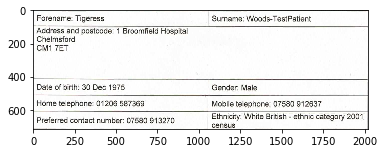

In [11]:
y = 1140
h = 715
x = 195
w = 2020
patient_details = image[y:y+h, x:x+w]

plt.imshow(patient_details)
#plt.savefig("my_patient_details.png")

In [13]:
type(patient_details)

numpy.ndarray

In [23]:
MyInput = Image.fromarray(patient_details).convert('L')

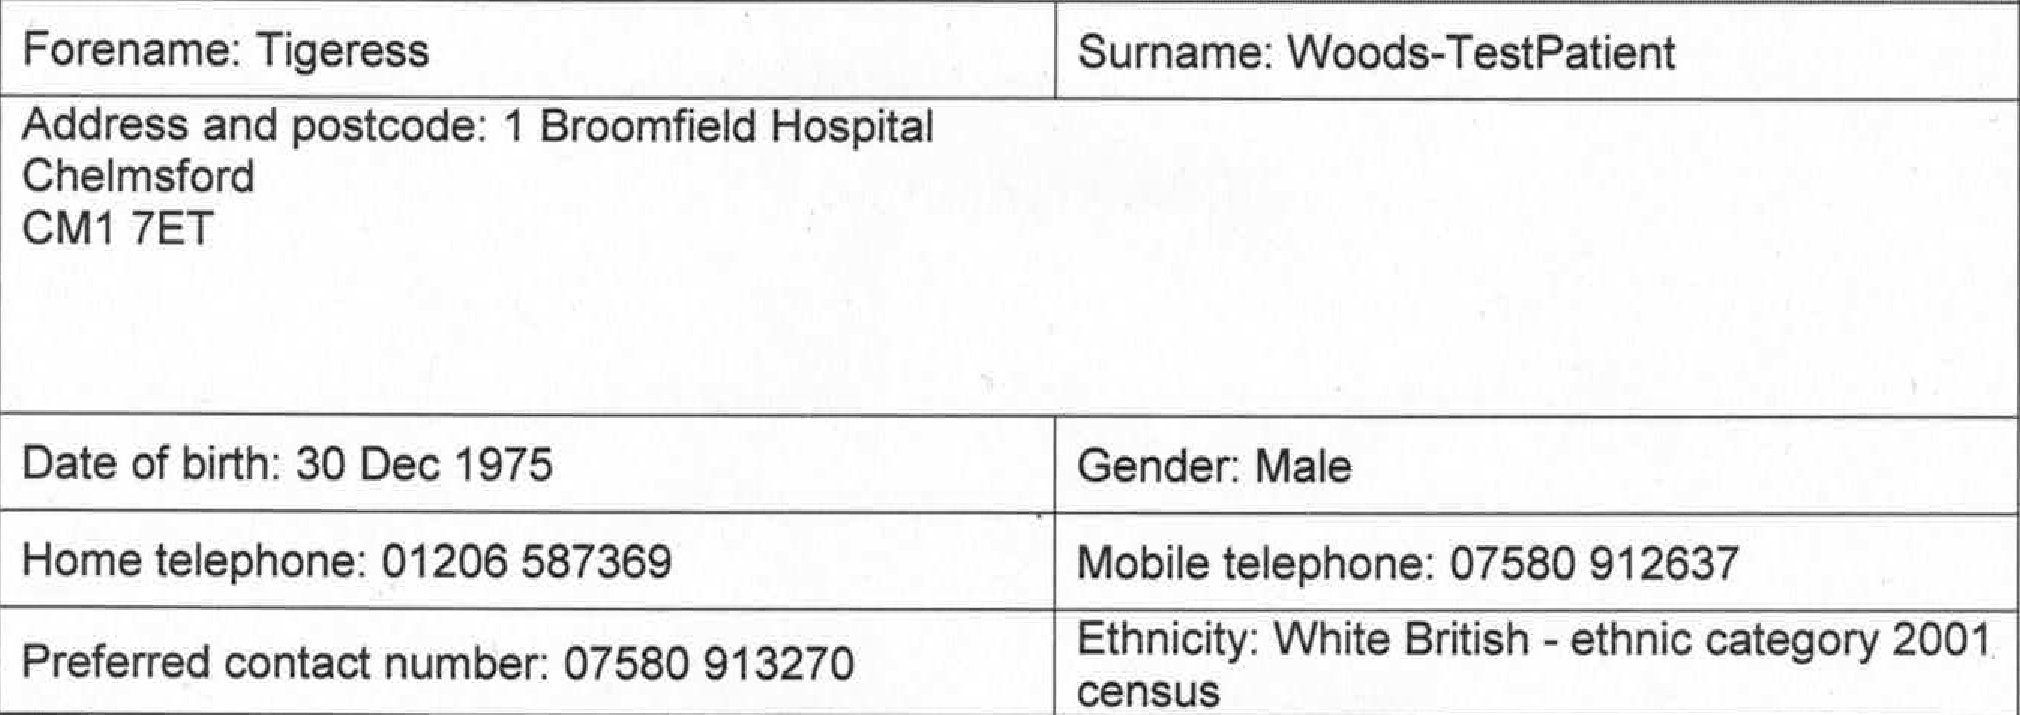

In [24]:
MyInput

In [30]:
cv2.imwrite('patient_details.png',patient_details)

True

In [31]:
# We can already detect the test through a quite nice Python OCR
text = pytesseract.image_to_string('patient_details.png')
print(text)

Forename: Tigeress Surname: Woods-TestPatient

Address and postcode: 1 Broomfield Hospital
Chelmsford
CM1 7ET

Date of birth: 30 Dec 1975 Gender: Male

Home telephone: 01206 587369 Mobile telephone: 07580 912637

Ethnicity: White British - ethnic category 2001
census

   

Preferred contact number: 07580 913270


In [32]:

y = 1130
h = 728
x = 180
w = 2050
patient_details = image[y:y+h, x:x+w]

gray_patient_details = cv2.cvtColor(patient_details, cv2.COLOR_BGR2GRAY) # input image must be grayscale
gray_patient_details = cv2.bilateralFilter(gray_patient_details,9,100,100) # this filter preserves edges and reduces overall noise in the image - better for both the OCR and the line detection

edges = cv2.Canny(gray_patient_details,1,500,apertureSize = 3) # the parameters have to be optimized
lines = cv2.HoughLines(edges,200,np.pi/10, 20) # # the parameters have to be optimized 


In [33]:

# The below for loop runs till r and theta values  
# are in the range of the 2d array 
for r,theta in lines[0]: 
      
    # Stores the value of cos(theta) in a 
    a = np.cos(theta) 
  
    # Stores the value of sin(theta) in b 
    b = np.sin(theta) 
      
    # x0 stores the value rcos(theta) 
    x0 = a*r 
      
    # y0 stores the value rsin(theta) 
    y0 = b*r 
      
    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta)) 
    x1 = int(x0 + 1000*(-b)) 
      
    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta)) 
    y1 = int(y0 + 1000*(a)) 
  
    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta)) 
    x2 = int(x0 - 1000*(-b)) 
      
    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta)) 
    y2 = int(y0 - 1000*(a)) 
      
    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2). 
    # (0,0,255) denotes the colour of the line to be  
    #drawn. In this case, it is red.  
    cv2.line(gray_patient_details,(x1,y1), (x2,y2), (0,0,255),5) 

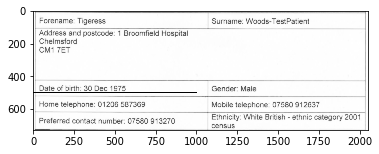

In [34]:

      
# All the changes made in the input image are finally 
# written on a new image houghlines.jpg 
cv2.imwrite('linesDetected.jpg', gray_patient_details) # I think that there is an issue with plotting here. We should make sure that we fix this in order to be able to 

plt.imshow(gray_patient_details, cmap='Greys_r')